# <center><font color='red'>DATASET SORAIA - ANALYSIS</font></center>
### <center><font color='orange'>AUTHOR: Diogo Vieira</font></center>

-------------------------------------------

### <center><font color='grey'>Imports</font></center>

#### <center><font color='grey'>Libraries</font></center>

> **kernel == CYSK**

In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle
from framework.ImageFeatures import ImageFeatures,getvoxelsize
from framework.Functions import cv2toski,pylsdtoski,polar_to_cartesian, remove_not1D, quantitative_analysis,hist_bin,hist_lim,create_separate_DFs,branch,graphAnalysis
from framework.Importing import label_image,init_import,label_image_soraia
from framework.PreProcessingCYTO import cytoskeleton_preprocessing, df_cytoskeleton_preprocessing
from framework.PreProcessingNUCL import excludeborder, nuclei_preprocessing, df_nuclei_preprocessing, nuclei_segmentation
from framework.Processing import process3Dnuclei,analyze_cell,df_analyze_cell
from framework.visualization import truncate_colormap, plot_hist, plot_pie,set_background
#from fractal_dimension import fractal_dimension
#from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


> **kernel == ROI Selection**

In [1]:
from framework.Importing import label_image,init_import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from roipoly import RoiPoly
import pickle

print('📚 All libraries successfully imported **(for ROI selection)** 📚')

📚 All libraries successfully imported **(for ROI selection)** 📚


#### <center><font color='grey'>Directories</font></center>

In [2]:
### DATASET #1 (2D)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"
# options   = ["RGB","CYTO_DECONV","NUCL_DECONV"]

### DATASET #2 (3D)
#folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 3D"
#options   = ["3D"]

### DATASET #3 (Soraia)
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
options   = ["CYTO_DECONV","NUCL_DECONV"]
#options   = ["3D"] #use this for roi selection

### DATASET #4 (Inês)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Ines"
#options     = ["CYTO_DECONV"]


data = init_import(folder,options)
data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 

>>> [CYTO_DECONV] added.
>>> [NUCL_DECONV] added.


In [3]:
data['3D']

Path  \
10  C:\Users\diogo\OneDrive - Universidade de Lisb...   
11  C:\Users\diogo\OneDrive - Universidade de Lisb...   
12  C:\Users\diogo\OneDrive - Universidade de Lisb...   
13  C:\Users\diogo\OneDrive - Universidade de Lisb...   
14  C:\Users\diogo\OneDrive - Universidade de Lisb...   
15  C:\Users\diogo\OneDrive - Universidade de Lisb...   
1   C:\Users\diogo\OneDrive - Universidade de Lisb...   
2   C:\Users\diogo\OneDrive - Universidade de Lisb...   
3   C:\Users\diogo\OneDrive - Universidade de Lisb...   
4   C:\Users\diogo\OneDrive - Universidade de Lisb...   
5   C:\Users\diogo\OneDrive - Universidade de Lisb...   
6   C:\Users\diogo\OneDrive - Universidade de Lisb...   
7   C:\Users\diogo\OneDrive - Universidade de Lisb...   
8   C:\Users\diogo\OneDrive - Universidade de Lisb...   
9   C:\Users\diogo\OneDrive - Universidade de Lisb...   

                                           Name Channel Label  \
10  MAX_10_AGSGatw_2245-0002_decon__ch00_PS.tif       0  2245   
11  MAX_11_AGSGatw_2245-0002_decon__ch01_PS.tif       1  2245   
12  MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif       2  2245   
13   MAX_13_AGSGatw_2494-0016_decon_ch00_PS.tif       0  2494   
14   MAX_14_AGSGatw_2494-0016_decon_ch01_PS.tif       1  2494   
15   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif       2  2494   
1      MAX_1_AGSGatw_WT-0010_decon__ch00_PS.tif       0    WT   
2      MAX_2_AGSGatw_WT-0010_decon__ch01_PS.tif       1    WT   
3      MAX_3_AGSGatw_WT-0010_decon__ch02_PS.tif       2    WT   
4     MAX_4_AGSGatw_Mock-0002_decon_ch00_PS.tif       0  Mock   
5     MAX_5_AGSGatw_Mock-0002_decon_ch01_PS.tif       1  Mock   
6     MAX_6_AGSGatw_Mock-0002_decon_ch02_PS.tif       2  Mock   
7     MAX_7_AGSGatw_1901-0007_decon_ch00_PS.tif       0  1901   
8     MAX_8_AGSGatw_1901-0007_decon_ch01_PS.tif       1  1901   
9     MAX_9_AGSGatw_1901-0007_decon_ch02_PS.tif       2  1901   

                                                Image  
10  [[52551, 52767, 50803, 56807, 56963, 54687, 52...  
11  [[36, 166, 452, 714, 714, 5492, 858, 92, 78, 1...  
12  [[14736, 22830, 29448, 24572, 18090, 17620, 19...  
13  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 962, ...  
14  [[0, 0, 0, 36, 286, 430, 362, 374, 748, 1418, ...  
15  [[44849, 36801, 35181, 36645, 38649, 36767, 29...  
1   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26...  
5   [[5410, 3178, 1398, 734, 590, 466, 624, 1160, ...  
6   [[34975, 28200, 16330, 14038, 23848, 30664, 23...  
7   [[44425, 33429, 27174, 30896, 29794, 27000, 35...  
8   [[320, 714, 3210, 2170, 1384, 1542, 1050, 1174...  
9   [[25498, 21032, 16938, 9666, 6120, 10942, 2079...

In [3]:
data['CYTO_DECONV']

Path  \
12  C:\Users\diogo\OneDrive - Universidade de Lisb...   
15  C:\Users\diogo\OneDrive - Universidade de Lisb...   
3   C:\Users\diogo\OneDrive - Universidade de Lisb...   
6   C:\Users\diogo\OneDrive - Universidade de Lisb...   
9   C:\Users\diogo\OneDrive - Universidade de Lisb...   

                                           Name Label  \
12  MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif  2245   
15   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif  2494   
3      MAX_3_AGSGatw_WT-0010_decon__ch02_PS.tif    WT   
6     MAX_6_AGSGatw_Mock-0002_decon_ch02_PS.tif  Mock   
9     MAX_9_AGSGatw_1901-0007_decon_ch02_PS.tif  1901   

                                                Image  
12  [[14736, 22830, 29448, 24572, 18090, 17620, 19...  
15  [[44849, 36801, 35181, 36645, 38649, 36767, 29...  
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6   [[34975, 28200, 16330, 14038, 23848, 30664, 23...  
9   [[25498, 21032, 16938, 9666, 6120, 10942, 2079...

In [4]:
data['NUCL_DECONV']

Path  \
12  C:\Users\diogo\OneDrive - Universidade de Lisb...   
15  C:\Users\diogo\OneDrive - Universidade de Lisb...   
3   C:\Users\diogo\OneDrive - Universidade de Lisb...   
6   C:\Users\diogo\OneDrive - Universidade de Lisb...   
9   C:\Users\diogo\OneDrive - Universidade de Lisb...   

                                           Name Label  \
12  MAX_12_AGSGatw_2245-0002_decon__ch00_PS.tif  2245   
15   MAX_15_AGSGatw_2494-0016_decon_ch00_PS.tif  2494   
3      MAX_3_AGSGatw_WT-0010_decon__ch00_PS.tif    WT   
6     MAX_6_AGSGatw_Mock-0002_decon_ch00_PS.tif  Mock   
9     MAX_9_AGSGatw_1901-0007_decon_ch00_PS.tif  1901   

                                                Image  
12  [[52551, 52767, 50803, 56807, 56963, 54687, 52...  
15  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 962, ...  
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26...  
9   [[44425, 33429, 27174, 30896, 29794, 27000, 35...

### <center><font color='grey'>__ Segmentation __ </font></center>

In [3]:
set_background('#A7A9AC33')

# OPTION 1: Import ROIs
ROIs    = pickle.load(open(folder + '\\ROIs\\'+ 'ROIs.p', 'rb'))  

# OPTION 2: Create new dataset
#ROIs    = pd.DataFrame(columns = ['Name','Index','Label','ROImask'])
    
print('>>> ROIs imported. ✔️')

>>> ROIs imported. ✔️


In [4]:
set_background('#A7A9AC33')
ROIs

Name Index Label  \
0    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif    12  2245   
1    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif    12  2245   
2    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif    12  2245   
3    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif    12  2245   
4    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif    12  2245   
..                                           ...   ...   ...   
99    MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif    15  2494   
100   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif    15  2494   
101   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif    15  2494   
102   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif    15  2494   
103   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif    15  2494   

                                               ROImask  
0    [[False, False, False, False, False, False, Fa...  
1    [[False, False, False, False, False, False, Fa...  
2    [[False, False, False, False, False, False, Fa...  
3    [[False, False, False, False, False, False, Fa...  
4    [[False, False, False, False, False, False, Fa...  
..                                                 ...  
99   [[False, False, False, False, False, False, Fa...  
100  [[False, False, False, False, False, False, Fa...  
101  [[False, False, False, False, False, False, Fa...  
102  [[False, False, False, False, False, False, Fa...  
103  [[False, False, False, False, False, False, Fa...  

[104 rows x 4 columns]

In [5]:
# global ROI
# print('🔎')
# while 1:
#     plt.close('all')

#     # Original Image
#     img = df['Image'][img_id]
#     #sk  = TextureDF.loc[img_id]['Skeleton']
    
#     mult = np.stack([1.8*df['Image'][12]/np.max(df['Image'][12]),1.8*df['Image'][11]/np.max(df['Image'][11]),1*df['Image'][10]/np.max(df['Image'][10])],axis=2)

#     # Remove blue channel and convert to grayscale
#     #tmp        = copy.deepcopy(img)
#     #tmp[:,:,0] = 0
#     #grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

#     #mult = np.stack([1.3*(grey / np.max(grey)),1.3*sk*(grey / np.max(grey)), np.zeros_like(sk)],axis=2)
#     #mult = np.stack([0.9*(grey / np.max(grey)),sk*(grey / np.max(grey)), 0.5 * (OriginalDF['Image'][img_id][:,:,0] / np.max(OriginalDF['Image'][img_id][:,:,0]))],axis=2)
#     #mult = np.stack([1.5*(grey / np.max(grey)),sk, 0.2 * (OriginalDF['Image'][img_id][:,:,0] / np.max(OriginalDF['Image'][img_id][:,:,0]))],axis=2)

    
#     # Select ROI QT
#     %matplotlib qt
#     fig,ax = plt.subplots(figsize=(30,30))

#     plt.imshow(mult)
#     plt.axis('off')
#     # Plot Contours
#     #plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=img_id,ax=ax)
#     # Define ROI
#     #plt.imshow(image, cmap='gray')
#     ROI = RoiPoly(color='r')
#     #ROI.display_roi()
#     #global mask,roi_coordinates
#     #roi_coordinates = ROI.get_roi_coordinates()
#     mask = ROI.get_mask(img)

#     # Save ROI
#     new = pd.DataFrame(data = {'Name': [df['Name'][img_id]],'Index': [img_id], 'Label': [df['Label'][img_id]], 'ROImask': [mask]})
#     ROIs = ROIs.append(new,ignore_index=True)

#     plt.show()


def roi_selector(data,img_id,ROIsDF):
    global ROI
    import copy
    print('🔎')
    
    if type(ROIsDF) != pd.core.frame.DataFrame:
        ROIsDF    = pd.DataFrame(columns = ['Name','Index','Label','ROImask'])
       
    ROIsDF_ = copy.deepcopy(ROIsDF)
    
    while 1:
        try:
            plt.close('all')

            # Original Image
            img = data['Image'][img_id]
            mult = np.stack([1.8*data['Image'][img_id]/np.max(data['Image'][img_id]),1.8*data['Image'][img_id-1]/np.max(data['Image'][img_id-1]),1*data['Image'][img_id-2]/np.max(data['Image'][img_id-2])],axis=2)


            # Select ROI QT
            #%matplotlib qt
            fig,ax = plt.subplots(figsize=(30,30))
            plt.imshow(mult)
            plt.axis('off')
            # Plot Contours
            #plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=img_id,ax=ax)
            # Define ROI

            ROI = RoiPoly(color='r')
            #ROI.display_roi()
            #global mask,roi_coordinates
            #roi_coordinates = ROI.get_roi_coordinates()
            mask = ROI.get_mask(img)

            # Save ROI
            new = pd.DataFrame(data = {'Name': [data['Name'][img_id]],'Index': [img_id], 'Label': [data['Label'][img_id]], 'ROImask': [mask]})
            ROIsDF_ = pd.concat([ROIsDF_, new], axis=0,ignore_index=True)


            plt.show()
        except Exception as e:
            print('Window closed')
            print(e)
            return ROIsDF_
        
print('function: roi_selector (Soraia)')

function: roi_selector (Soraia)


In [93]:
#set_background('#A7A9AC33')

# Change Kernel
#from framework.manual_segmentation import roi_selector
%matplotlib qt
#data['3D'] must be selected to show ROI
ROIs = roi_selector(data = data['3D'],img_id = 15,ROIsDF = ROIs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


🔎


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Window closed
list index out of range


**DELETE LAST ROW**

**SAVE ROIs DATAFRAME**

In [96]:
#ROIs.to_pickle(folder + "//ROIs.pkl") 
ROIs.to_pickle(folder + '\\ROIs\\'+ 'ROIs.p')
#ROIs    = pickle.load(open(folder + '\\ROIs\\'+ 'ROIs.p', 'rb'))  


In [11]:
def plot_ROIs_and_centroids(img_id,data,ROIsDF):
    
    df = ROIsDF[ROIsDF['Index']==img_id]
    df_NUCL_PRE = data['NUCL_PRE'][data['NUCL_PRE']['Img Index']==img_id]

    i = 0
    for index,row in df.iterrows():
        if i == 0:
            auxx = row['ROImask']
            i = 1
            break
        else:
            auxx = auxx + row['ROImask']
            
            
    fig,ax = plt.subplots(figsize=(10,10))
    plt.imshow(auxx,cmap='gray')
    plt.axis('off')
    
    for index,row in df_NUCL_PRE.iterrows():
        plt.plot(row['Centroid'][1],row['Centroid'][0],'o',color='red',markersize=5)
    
    
#     plt.tight_layout()

#     # PLOT MASK WITH NUCLEI ID
#     plt.subplot(1,3,2)
#     #path     = dir_masks + '/nuclei_' + row['Name']
#     path     = dir_masks + "\\" + row['Name'] + "f"
#     nuc_mask = cv2.imread(path,-1)
#     plt.imshow(nuc_mask,cmap="gray")
#     plt.axis('off')
#     plt.tight_layout()

#     # PLOT MASK WITH CENTROIDS
#     plt.subplot(1,3,3)
#     plt.imshow(nuc_mask,cmap="gray")
#     plt.axis('off')
    
#     plt.tight_layout()

plot_ROIs_and_centroids(12,data,ROIsDF)

KeyError: 'NUCL_PRE'

### <center><font color='grey'>__ Preprocessing __</font></center>

#### <center><font color='grey'>Nuclei</font></center>

>>>>>> SEGMENTATION: Image MAX_12_AGSGatw_2245-0002_decon__ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_15_AGSGatw_2494-0016_decon_ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_3_AGSGatw_WT-0010_decon__ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_6_AGSGatw_Mock-0002_decon_ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_9_AGSGatw_1901-0007_decon_ch00_PS.tif
>>>>>> PREPROCESSING: Image MAX_12_AGSGatw_2245-0002_decon__ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\Datasets\Soraia_masks\MAX_12_AGSGatw_2245-0002_decon__ch00_PS.tif
>>> Preprocessing: 2.7027027027027026
>>> Preprocessing: 5.405405405405405
>>> Preprocessing: 8.108108108108109
>>> Preprocessing: 10.81081081081081
>>> Preprocessing: 13.513513513513514
>>> Preprocessing: 16.216216216216218
>>> Preprocessing: 18.91891891891892
>>> Preprocessing: 21.62162162162162
>>> Preprocessing: 24.324324324324323
>>> Preprocessing: 27.027027027027028
>>> Preprocessing: 29.72972972972973
>>> Preprocessing:

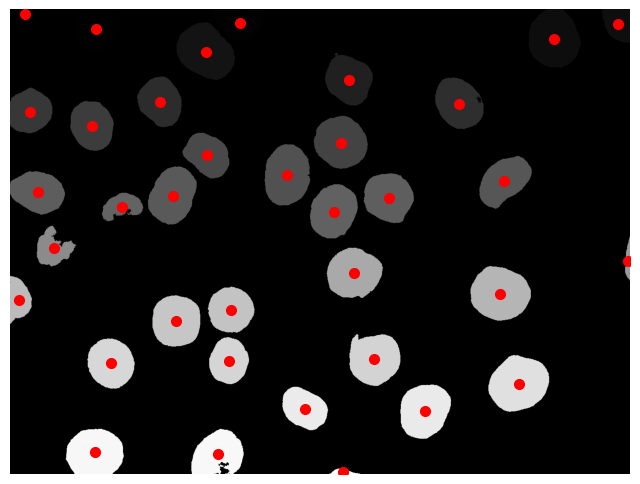

>>>>>> PREPROCESSING: Image MAX_15_AGSGatw_2494-0016_decon_ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\Datasets\Soraia_masks\MAX_15_AGSGatw_2494-0016_decon_ch00_PS.tif
>>> Preprocessing: 4.545454545454546
>>> Preprocessing: 9.090909090909092
>>> Preprocessing: 13.636363636363637
>>> Preprocessing: 18.181818181818183
>>> Preprocessing: 22.727272727272727
>>> Preprocessing: 27.272727272727273
>>> Preprocessing: 31.818181818181817
>>> Preprocessing: 36.36363636363637
>>> Preprocessing: 40.90909090909091
>>> Preprocessing: 45.45454545454545
>>> Preprocessing: 50.0
>>> Preprocessing: 54.54545454545455
>>> Preprocessing: 59.09090909090909
>>> Preprocessing: 63.63636363636363
>>> Preprocessing: 68.18181818181819
>>> Preprocessing: 72.72727272727273
>>> Preprocessing: 77.27272727272727
>>> Preprocessing: 81.81818181818181
>>> Preprocessing: 86.36363636363636
>>> Preprocessing: 90.9090909090909
>>> Preprocessing: 95.45454545454545


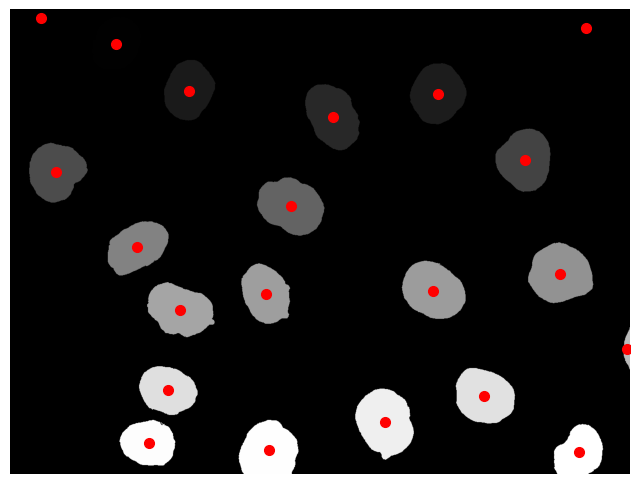

>>>>>> PREPROCESSING: Image MAX_3_AGSGatw_WT-0010_decon__ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\Datasets\Soraia_masks\MAX_3_AGSGatw_WT-0010_decon__ch00_PS.tif
>>> Preprocessing: 3.125
>>> Preprocessing: 6.25
>>> Preprocessing: 9.375
>>> Preprocessing: 12.5
>>> Preprocessing: 15.625
>>> Preprocessing: 18.75
>>> Preprocessing: 21.875
>>> Preprocessing: 25.0
>>> Preprocessing: 28.125
>>> Preprocessing: 31.25
>>> Preprocessing: 34.375
>>> Preprocessing: 37.5
>>> Preprocessing: 40.625
>>> Preprocessing: 43.75
>>> Preprocessing: 46.875
>>> Preprocessing: 50.0
>>> Preprocessing: 53.125
>>> Preprocessing: 56.25
>>> Preprocessing: 59.375
>>> Preprocessing: 62.5
>>> Preprocessing: 65.625
>>> Preprocessing: 68.75
>>> Preprocessing: 71.875
>>> Preprocessing: 75.0
>>> Preprocessing: 78.125
>>> Preprocessing: 81.25
>>> Preprocessing: 84.375
>>> Preprocessing: 87.5
>>> Preprocessing: 90.625
>>> Preprocessing: 93.75
>>> Preprocessing: 96.875


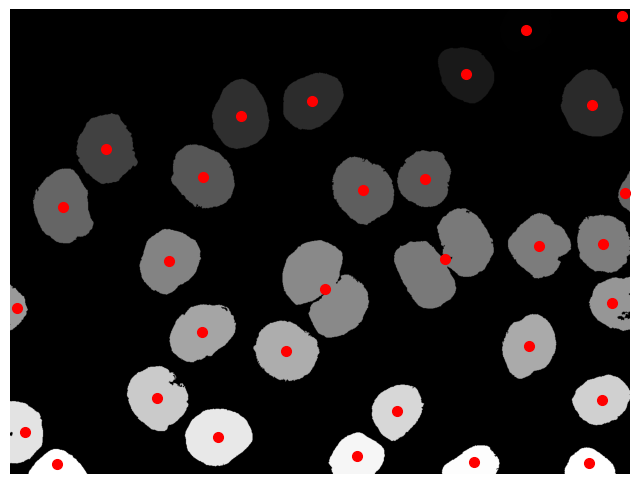

>>>>>> PREPROCESSING: Image MAX_6_AGSGatw_Mock-0002_decon_ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\Datasets\Soraia_masks\MAX_6_AGSGatw_Mock-0002_decon_ch00_PS.tif
>>> Preprocessing: 2.857142857142857
>>> Preprocessing: 5.714285714285714
>>> Preprocessing: 8.571428571428571
>>> Preprocessing: 11.428571428571429
>>> Preprocessing: 14.285714285714286
>>> Preprocessing: 17.142857142857142
>>> Preprocessing: 20.0
>>> Preprocessing: 22.857142857142858
>>> Preprocessing: 25.714285714285715
>>> Preprocessing: 28.571428571428573
>>> Preprocessing: 31.428571428571427
>>> Preprocessing: 34.285714285714285
>>> Preprocessing: 37.142857142857146
>>> Preprocessing: 40.0
>>> Preprocessing: 42.857142857142854
>>> Preprocessing: 45.714285714285715
>>> Preprocessing: 48.57142857142857
>>> Preprocessing: 51.42857142857143
>>> Preprocessing: 54.285714285714285
>>> Preprocessing: 57.142857142857146
>>> Preprocessing: 60.0
>>> Preprocessing: 62.85714285

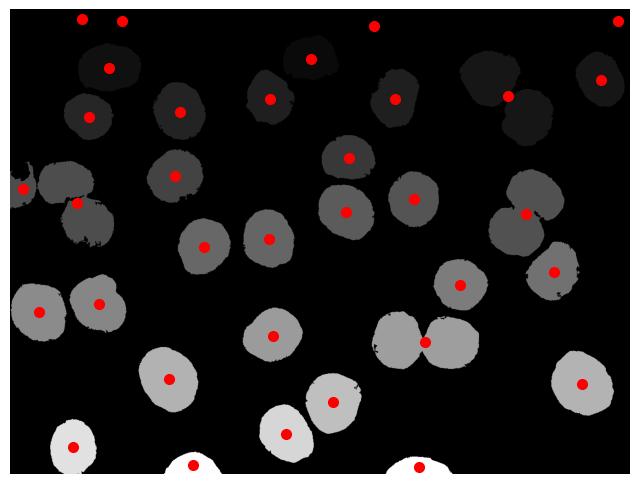

>>>>>> PREPROCESSING: Image MAX_9_AGSGatw_1901-0007_decon_ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\Datasets\Soraia_masks\MAX_9_AGSGatw_1901-0007_decon_ch00_PS.tif
>>> Preprocessing: 3.0303030303030303
>>> Preprocessing: 6.0606060606060606
>>> Preprocessing: 9.090909090909092
>>> Preprocessing: 12.121212121212121
>>> Preprocessing: 15.151515151515152
>>> Preprocessing: 18.181818181818183
>>> Preprocessing: 21.21212121212121
>>> Preprocessing: 24.242424242424242
>>> Preprocessing: 27.272727272727273
>>> Preprocessing: 30.303030303030305
>>> Preprocessing: 33.333333333333336
>>> Preprocessing: 36.36363636363637
>>> Preprocessing: 39.39393939393939
>>> Preprocessing: 42.42424242424242
>>> Preprocessing: 45.45454545454545
>>> Preprocessing: 48.484848484848484
>>> Preprocessing: 51.515151515151516
>>> Preprocessing: 54.54545454545455
>>> Preprocessing: 57.57575757575758
>>> Preprocessing: 60.60606060606061
>>> Preprocessing: 63.63636363

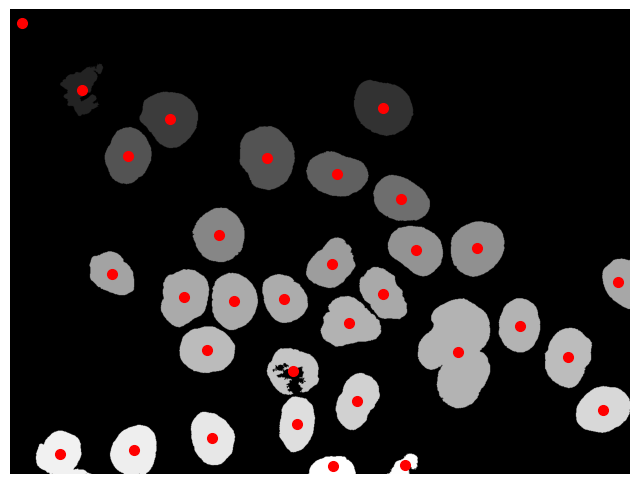

In [30]:
set_background('#83BAE533')
data['NUCL_PRE'] = df_nuclei_preprocessing(NUCL_df         = data['NUCL_DECONV'],                               #OR data['NUCL_DECONV'],data['3D']
                                           dir_nucldec     = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia", #OR os.getcwd() + "\\Datasets\\Set 1-a-tubulin_Sofia", os.getcwd() + "\\Datasets\\Set 3D"
                                           dir_masks       = os.path.dirname(os.getcwd()) + '\\Datasets\\Soraia_masks',             #OR os.getcwd() + '\\Datasets\\maisexps2', os.getcwd() + '\\Datasets\\exps_newalgo'
                                           algorithm       = "contour",                                         #OR stardist, contour                       
                                           algorithm_specs = [[0.7,0.8,1,0.9,1],400],                                         #OR [0.5,600] [0.7,1.15,1.0, 1.3,1.4,1.1,1.4,1.3,1,1,1.25,1.3,1.25,1.1,0.6,1.4,0.5]
                                           plot            = True,
                                           save            = False)                                         

In [31]:
set_background('#83BAE533')
data['NUCL_PRE']

Img Index Label                                       Nucleus Mask  \
0          12  2245  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1          12  2245  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2          12  2245  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3          12  2245  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4          12  2245  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
..        ...   ...                                                ...   
149         9  1901  [[901, 901, 901, 901, 901, 901, 901, 901, 901,...   
150         9  1901  [[930, 930, 930, 930, 930, 930, 930, 930, 931,...   
151         9  1901  [[943, 943, 943, 943, 943, 943, 943, 943, 943,...   
152         9  1901  [[994, 994, 994, 994, 995, 995, 995, 995, 995,...   
153         9  1901  [[1000, 1000, 1000, 1000, 1000, 1000, 1000, 10...   

                Centroid                                            Contour  
0        (9.005, 31.971)  ([[[0 0]], [[0 1]], [[0 2]], [[0 3]], [[0 4]],...  
1      (43.753, 192.965)  ([[[174   0]], [[173   1]], [[172   1]], [[171...  
2      (29.957, 513.691)  ([[[453   0]], [[453   1]], [[453   2]], [[453...  
3     (66.295, 1217.634)  ([[[1202    0]], [[1201    1]], [[1200    1]],...  
4     (32.967, 1359.962)  ([[[1326    0]], [[1326    1]], [[1326    2]],...  
..                   ...                                                ...  
149   (959.593, 452.114)  ([[[430 901]], [[429 902]], [[428 902]], [[427...  
150    (986.69, 278.205)  ([[[285 930]], [[284 931]], [[283 931]], [[282...  
151   (995.193, 111.852)  ([[[107 943]], [[106 944]], [[105 944]], [[104...  
152  (1018.981, 884.636)  ([[[893 994]], [[892 995]], [[891 995]], [[890...  
153   (1021.754, 721.55)  ([[[ 717 1000]], [[ 716 1001]], [[ 715 1001]],...  

[154 rows x 5 columns]

In [14]:
set_background('#83BAE533')
data['NUCL_PRE'].to_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") 

#### <div style="background-color: #BD212F1A;"><center><font color='grey'><h4>Cytoskeleton</h4></font></center></div>


In [5]:
set_background('#BD212F1A')
data['CYTO_PRE'] = df_cytoskeleton_preprocessing(data['CYTO_DECONV'])

>>> Image 12 done.
>>> Image 15 done.
>>> Image 3 done.
>>> Image 6 done.
>>> Image 9 done.


In [6]:
set_background('#BD212F1A')
data['CYTO_PRE']

Name Index Label  \
12  MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif    12  2245   
15   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif    15  2494   
3      MAX_3_AGSGatw_WT-0010_decon__ch02_PS.tif     3    WT   
6     MAX_6_AGSGatw_Mock-0002_decon_ch02_PS.tif     6  Mock   
9     MAX_9_AGSGatw_1901-0007_decon_ch02_PS.tif     9  1901   

                                             Skeleton  
12  [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,...  
15  [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6   [[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,...  
9   [[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...

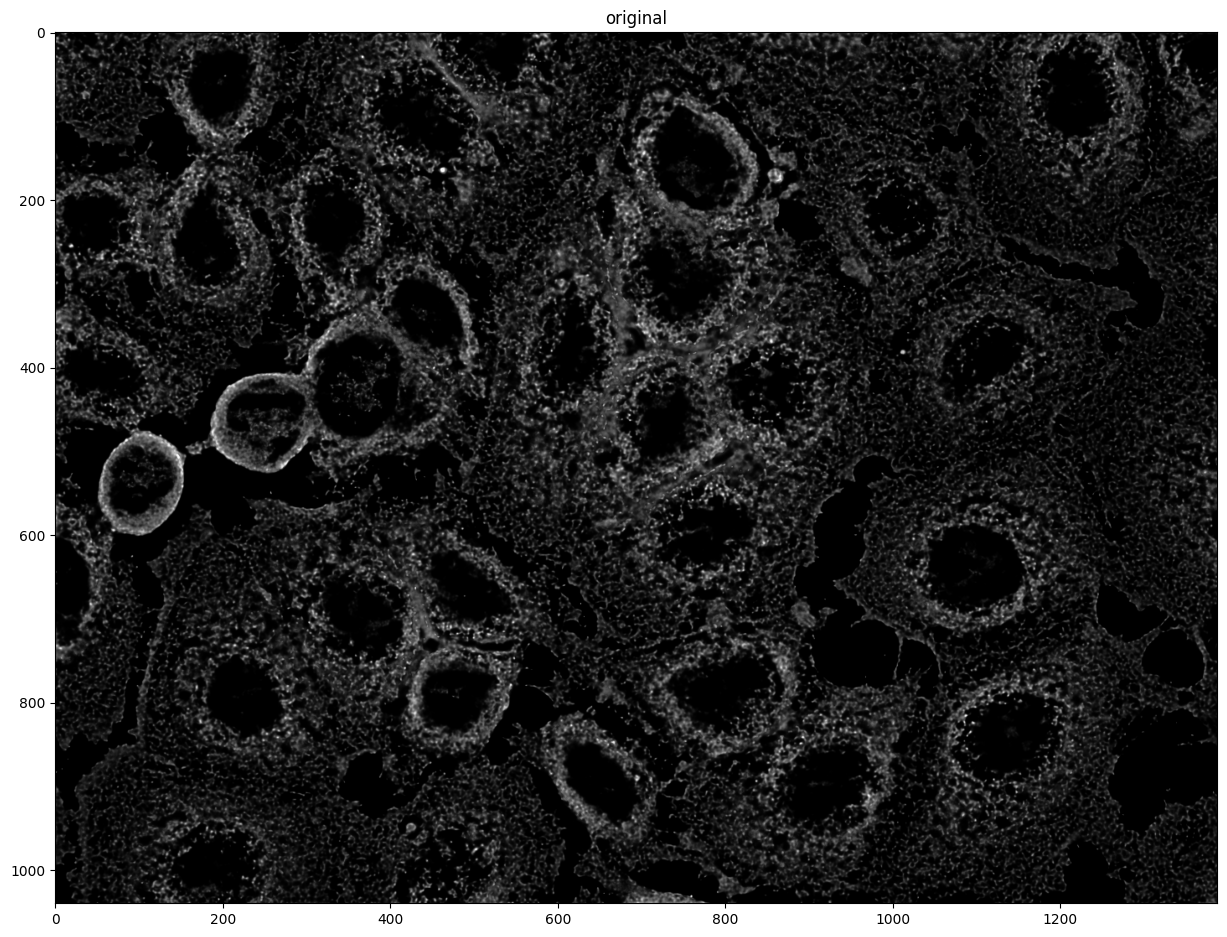

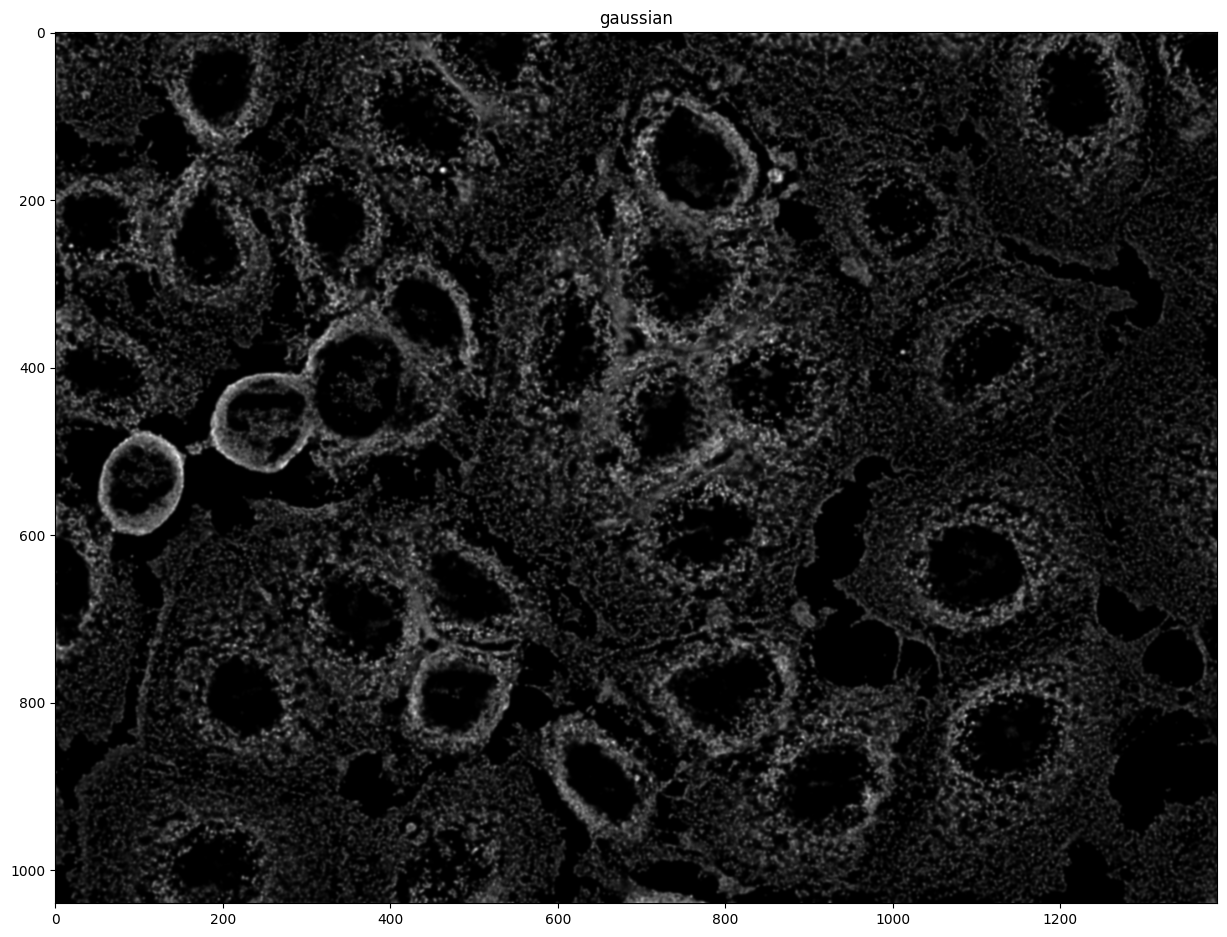

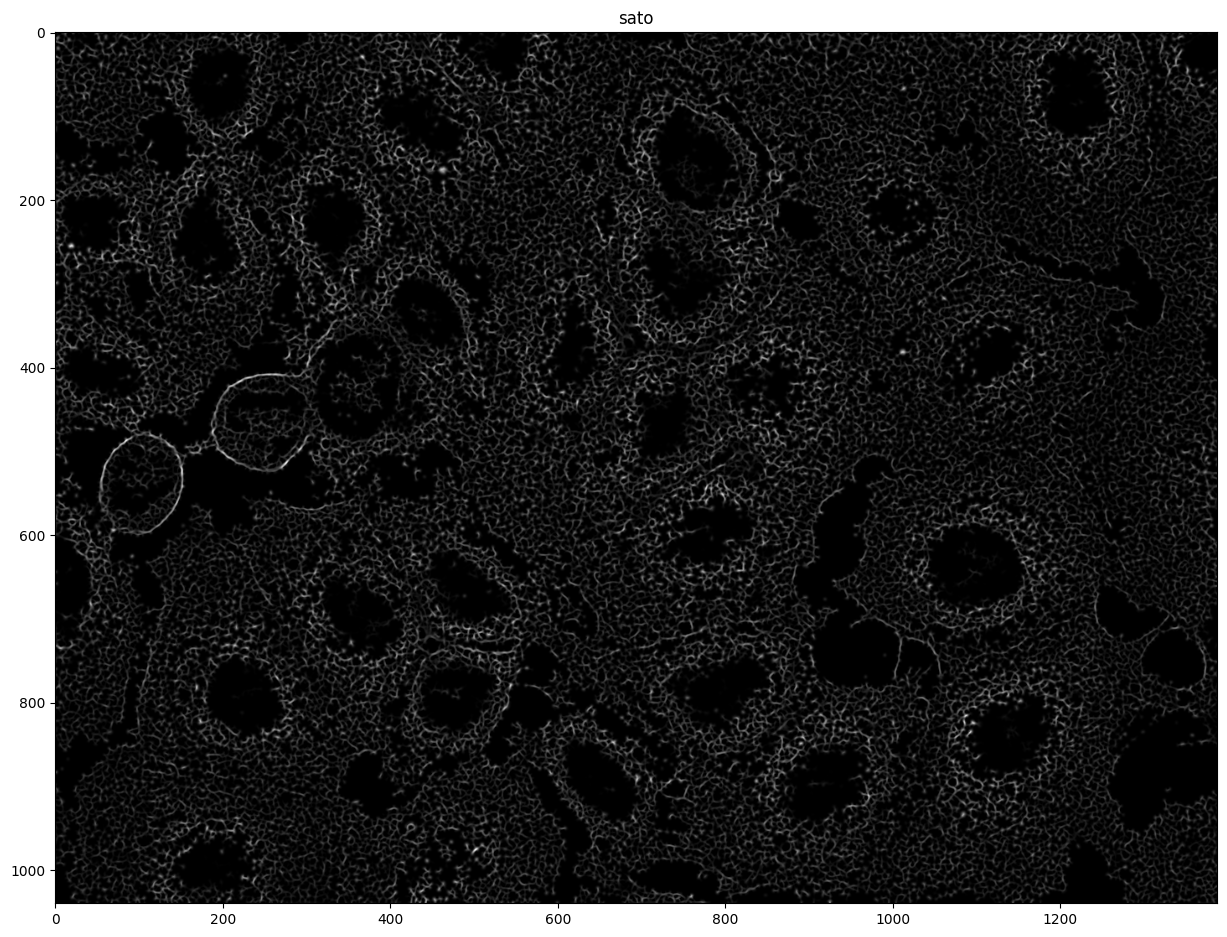

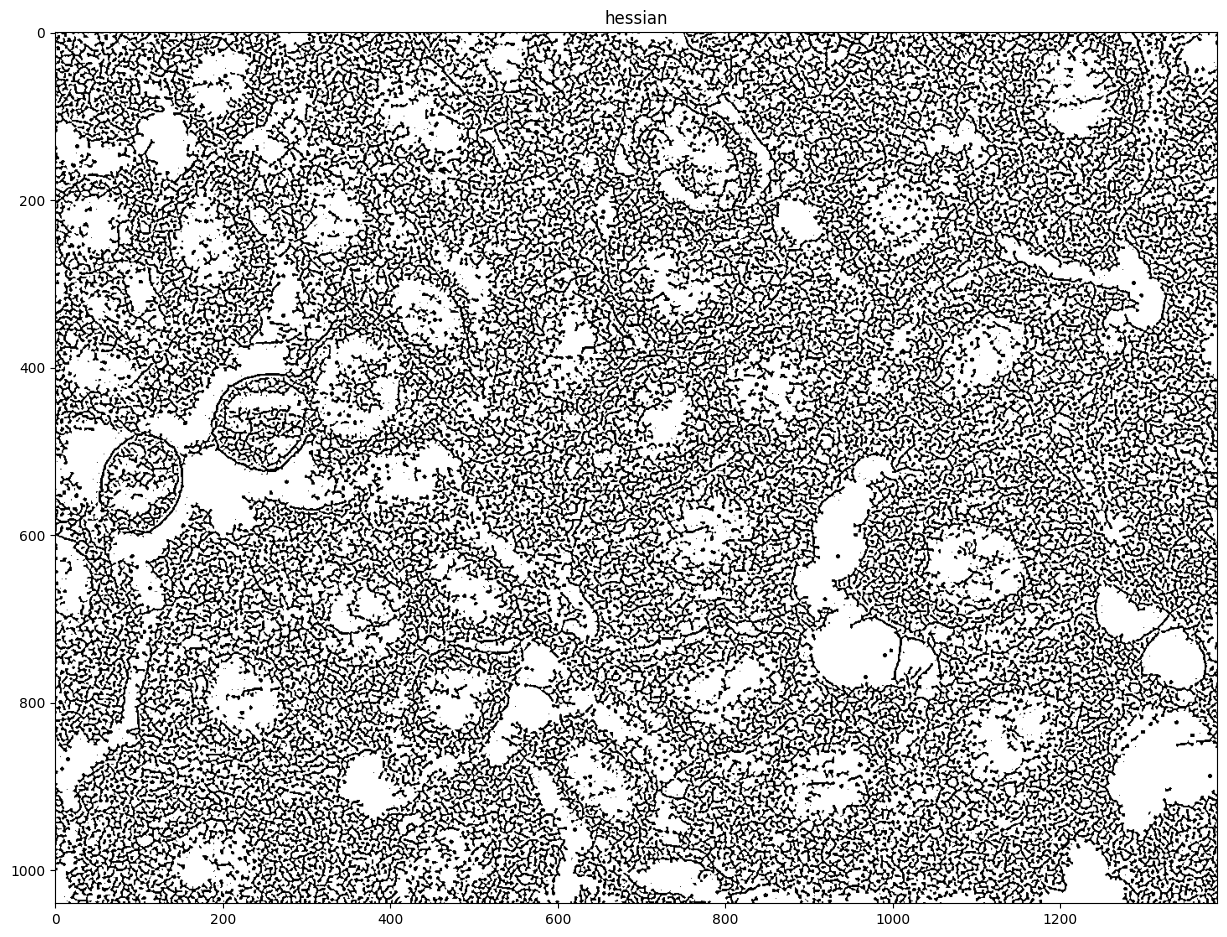

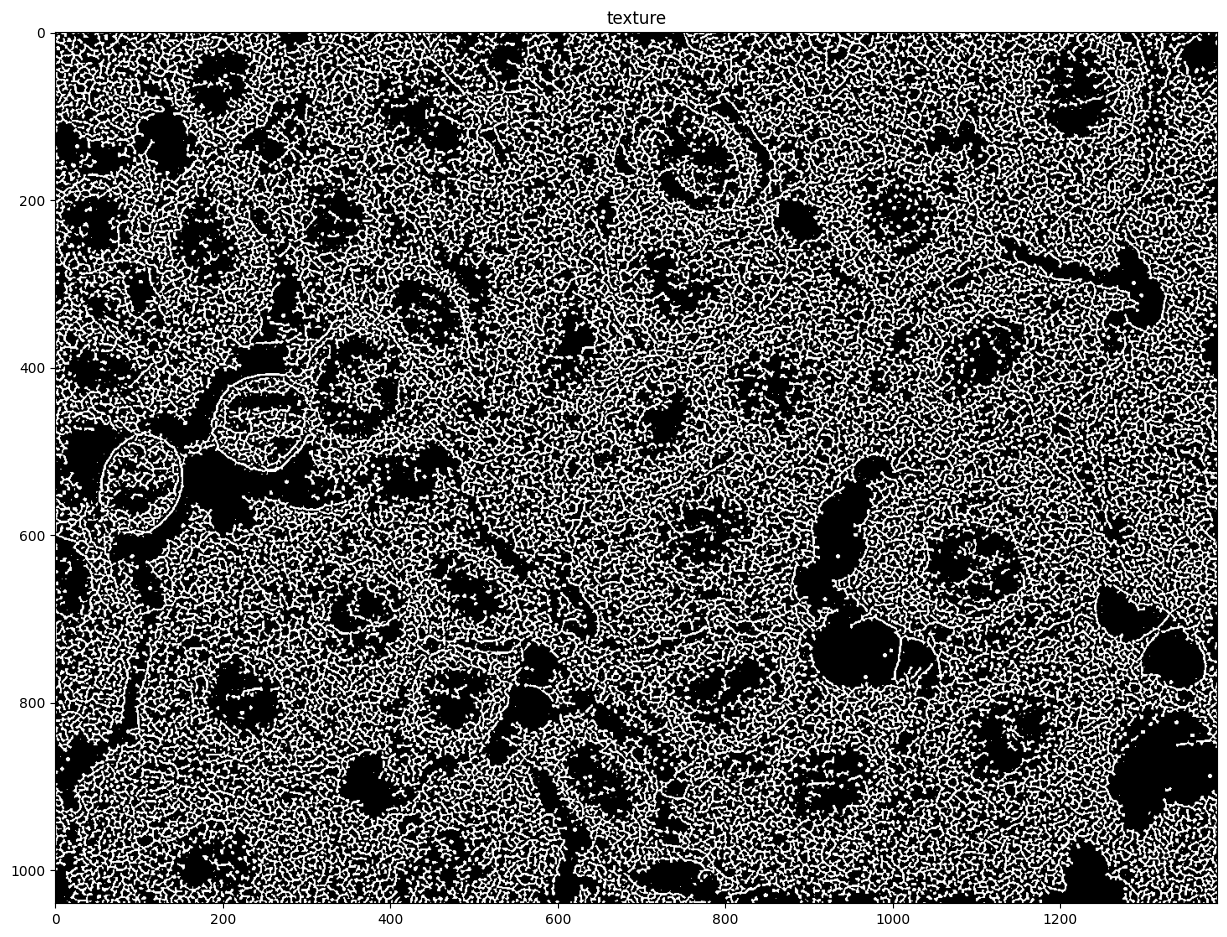

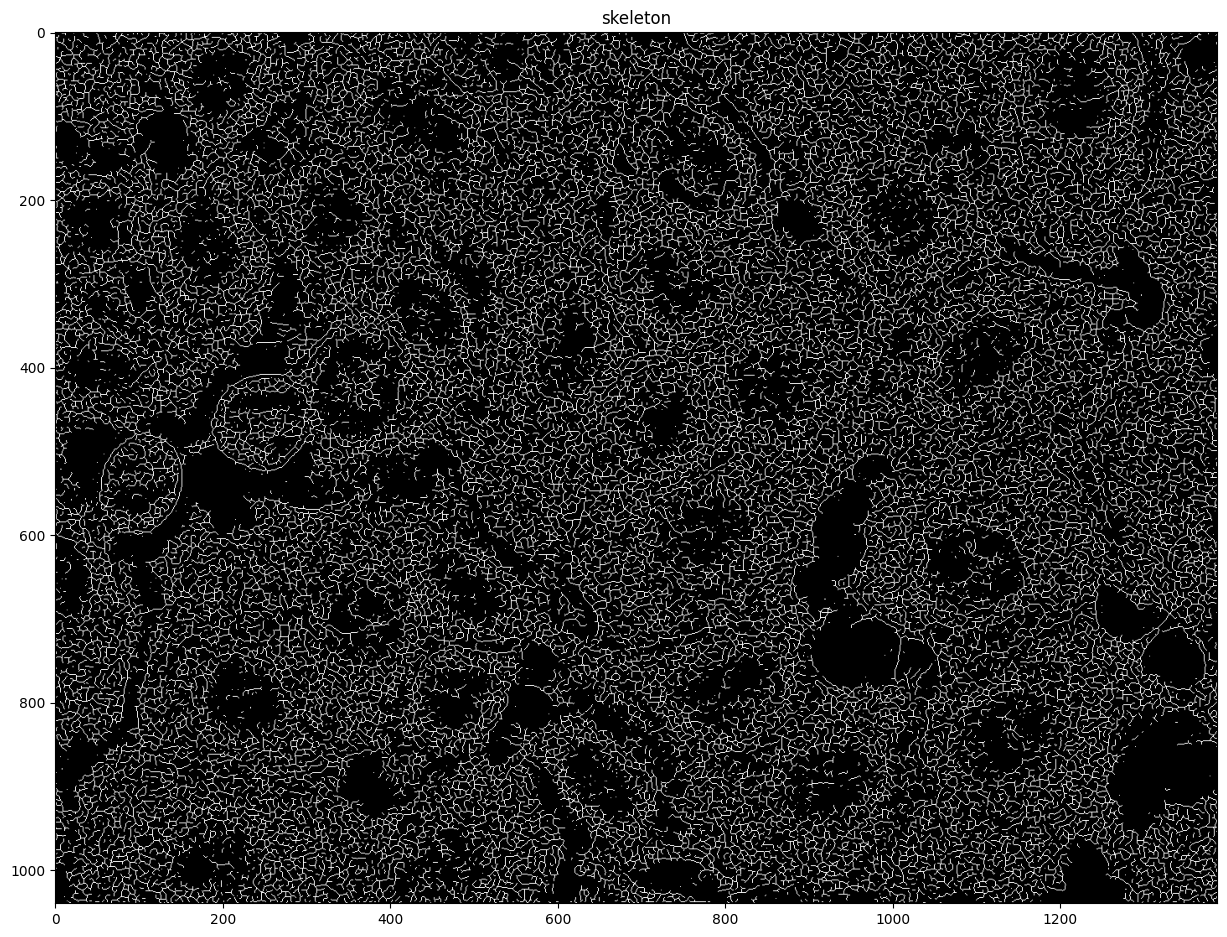

In [15]:
for index,row in data['CYTO_DECONV'].iterrows():
    texture,skeleton = cytoskeleton_preprocessing([row['Image'],index],  algorithm='soraia', parameters=[0.03,500],plot=True)
    
    break

In [10]:
set_background('#BD212F1A')
data['CYTO_PRE'].to_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 

### <div style="background-color: #BD223166;"><center><font color='grey'><h4>__ Processing __</h4></font></center></div>

In [5]:
set_background('#BD223166')
global features
features = ['DCF:Area',
            'DCF:BB Area',
            'DCF:Perimeter',
            'DCF:Area convex',
            'DCF:Centroid',
            'DCF:Weighted Centroid',
            'DCF:Centroid Divergence',
            'DCF:Equivalent Diameter',
            'DCF:Extent',
            'DCF:Major Axis Length',
            'DCF:Minor Axis Length',
            'DCF:Height',
            'DCF:Euler Number',
            'DCF:Eccentricity',
            'DCF:Circularity',
            'DCF:Roundness',
            'DCF:Orientation',
            'DCF:Solidity',
            'DCF:Roughness',
            'DCF:Hu Moment #1',
            'DCF:Hu Moment #2',
            'DCF:Hu Moment #3',
            'DCF:Weighted Hu Moment #1',
            'DCF:Weighted Hu Moment #1',
            'DCF:Weighted Hu Moment #1',
            'DCF:Feret Diameter Max',
            'DCF:Crofton Perimeter',
            
            'DCF:Mean Intensity',
            'DCF:Std',
            'DCF:Variance',
            'DCF:Skewness',
            'DCF:Kurtosis',
            'DCF:Contrast',
            'DCF:Max Intensity',
            'DCF:Min Intensity',
            'DCF:Entropy',
            'DCF:Inertia Tensor Highest Eigenvalue',
            'DCF:Inertia Tensor Lowest Eigenvalue',
            
            'DCF:Uniformity',
            'DCF:Invariant Uniformity',
            'DCF:GLCM Entropy',
            'DCF:GLCM Invariant Entropy',
            'DCF:Correlation',
            'DCF:Invariant Correlation',
            'DCF:Dissimilarity',
            'DCF:Invariant Dissimilarity',
            'DCF:Contrast',
            'DCF:Invariant Contrast',
            'DCF:Homogeneity',
            'DCF:Invariant Homogeneity',
            'DCF:Energy',
            'DCF:Invariant Energy',
            
            'DCF:Mean Gabor Power',
            'DCF:Gabor Variance',
            'DCF:Gabor Mean',
            'DCF:Gabor Energy',
            'DCF:Gabor Entropy',
            'DCF:Mean Spectral Magnitude',
            'DCF:Mean Spectral Power'
            
            
            'DNF:Area',
            'DNF:BB Area',
            'DNF:Perimeter',
            'DNF:Area convex',
            'DNF:Centroid',
            'DNF:Weighted Centroid',
            'DNF:Centroid Divergence',
            'DNF:Equivalent Diameter',
            'DNF:Extent',
            'DNF:Major Axis Length',
            'DNF:Minor Axis Length',
            'DNF:Height',
            'DNF:Euler Number',
            'DNF:Eccentricity',
            'DNF:Circularity',
            'DNF:Roundness',
            'DNF:Orientation',
            'DNF:Solidity',
            'DNF:Roughness',
            'DNF:Hu Moment #1',
            'DNF:Hu Moment #2',
            'DNF:Hu Moment #3',
            'DNF:Weighted Hu Moment #1',
            'DNF:Weighted Hu Moment #1',
            'DNF:Weighted Hu Moment #1',
            'DNF:Feret Diameter Max',
            'DNF:Crofton Perimeter',
            
            'DNF:Mean Intensity',
            'DNF:Std',
            'DNF:Variance',
            'DNF:Skewness',
            'DNF:Kurtosis',
            'DNF:Contrast',
            'DNF:Max Intensity',
            'DNF:Min Intensity',
            'DNF:Entropy',
            'DNF:Inertia Tensor Highest Eigenvalue',
            'DNF:Inertia Tensor Lowest Eigenvalue',
            
            'DNF:Uniformity',
            'DNF:Invariant Uniformity',
            'DNF:GLCM Entropy',
            'DNF:GLCM Invariant Entropy',
            'DNF:Correlation',
            'DNF:Invariant Correlation',
            'DNF:Dissimilarity',
            'DNF:Invariant Dissimilarity',
            'DNF:Contrast',
            'DNF:Invariant Contrast',
            'DNF:Homogeneity',
            'DNF:Invariant Homogeneity',
            'DNF:Energy',
            'DNF:Invariant Energy',
            
            'DNF:Mean Gabor Power',
            'DNF:Gabor Variance',
            'DNF:Gabor Mean',
            'DNF:Gabor Energy',
            'DNF:Gabor Entropy',
            'DNF:Mean Spectral Magnitude',
            'DNF:Mean Spectral Power'
            
            
            
            'LSF2D:Angles',
            'LSF2D:Distances to Centroid',
            'LSF2D:Triangle Areas',
            'LSF2D:Line Lengths',
            'LSF2D:Theta',
            'LSF2D:Angle Difference',
            'LSF2D:Std. Angle Difference',
            'LSF2D:Local Line Distance',
            'LSF2D:Std. Local Line Distance',
            'LSF2D:PAD',
           
            'LSF1D:Number of Lines',
          #  'LSF1D:Radial Score',
            'LSF1D:Complete Diameter Distance',
            'LSF1D:Average Diameter Distance',
            'LSF1D:TAD',
            'LSF1D:OOP',
            'LSF1D:HI',
            'LSF1D:MCM',
           
           
            
            'CNF1D:Number of Branches',
            
            'CNF2D:branch-distance',
            'CNF1D:branch-distance mean',
            'CNF1D:branch-distance median',
            'CNF1D:branch-distance min',
            'CNF1D:branch-distance max',
            'CNF1D:branch-distance max_amp',
            'CNF1D:branch-distance var',
            'CNF1D:branch-distance std_dev',
            'CNF1D:branch-distance abs_dev',
            'CNF1D:branch-distance kurtosis',
            'CNF1D:branch-distance skewness',
            
            'CNF2D:mean-pixel-value',
            'CNF1D:mean-pixel-value mean',
            'CNF1D:mean-pixel-value median',
            'CNF1D:mean-pixel-value min',
            'CNF1D:mean-pixel-value max',
            'CNF1D:mean-pixel-value max_amp',
            'CNF1D:mean-pixel-value var',
            'CNF1D:mean-pixel-value std_dev',
            'CNF1D:mean-pixel-value abs_dev',
            'CNF1D:mean-pixel-value kurtosis',
            'CNF1D:mean-pixel-value skewness',
            
            'CNF2D:stdev-pixel-value',
            'CNF1D:stdev-pixel-value mean',
            'CNF1D:stdev-pixel-value median',
            'CNF1D:stdev-pixel-value min',
            'CNF1D:stdev-pixel-value max',
            'CNF1D:stdev-pixel-value max_amp',
            'CNF1D:stdev-pixel-value var',
            'CNF1D:stdev-pixel-value std_dev',
            'CNF1D:stdev-pixel-value abs_dev',
            'CNF1D:stdev-pixel-value kurtosis',
            'CNF1D:stdev-pixel-value skewness',
            
            'CNF2D:euclidean-distance',
            'CNF1D:euclidean-distance mean',
            'CNF1D:euclidean-distance median',
            'CNF1D:euclidean-distance min',
            'CNF1D:euclidean-distance max',
            'CNF1D:euclidean-distance max_amp',
            'CNF1D:euclidean-distance var',
            'CNF1D:euclidean-distance std_dev',
            'CNF1D:euclidean-distance abs_dev',
            'CNF1D:euclidean-distance kurtosis',
            'CNF1D:euclidean-distance skewness',
            
            'CNF1D:Number of Endpoint-to-endpoint (isolated branch)',
            'CNF1D:Ratio of Endpoint-to-endpoint (isolated branch)',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) branch-distance',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) branch-distance',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) mean-pixel-value',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) mean-pixel-value',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) stdev-pixel-value',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) stdev-pixel-value',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) euclidean-distance',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) euclidean-distance',
            
            'CNF1D:Number of Junction-to-endpoints',
            'CNF1D:Ratio of Junction-to-endpoints',
            'CNF1D:Mean of Junction-to-endpoints branch-distance',
            'CNF1D:Std of Junction-to-endpoints branch-distance',
            'CNF1D:Mean of Junction-to-endpoints mean-pixel-value',
            'CNF1D:Std of Junction-to-endpoints mean-pixel-value',
            'CNF1D:Mean of Junction-to-endpoints stdev-pixel-value',
            'CNF1D:Std of Junction-to-endpoints stdev-pixel-value',
            'CNF1D:Mean of Junction-to-endpoints euclidean-distance',
            'CNF1D:Std of Junction-to-endpoints euclidean-distance',
            
            'CNF1D:Number of Junction-to-junctions',
            'CNF1D:Ratio of Junction-to-junctions',
            'CNF1D:Mean of Junction-to-junctions branch-distance',
            'CNF1D:Std of Junction-to-junctions branch-distance',
            'CNF1D:Mean of Junction-to-junctions mean-pixel-value',
            'CNF1D:Std of Junction-to-junctions mean-pixel-value',
            'CNF1D:Mean of Junction-to-junctions stdev-pixel-value',
            'CNF1D:Std of Junction-to-junctions stdev-pixel-value',
            'CNF1D:Mean of Junction-to-junctions euclidean-distance',
            'CNF1D:Std of Junction-to-junctions euclidean-distance',
            
            'CNF1D:Number of Isolated cycles',
            'CNF1D:Ratio of Isolated cycles',
            'CNF1D:Mean of Isolated cycles branch-distance',
            'CNF1D:Std of Isolated cycles branch-distance',
            'CNF1D:Mean of Isolated cycles mean-pixel-value',
            'CNF1D:Std of Isolated cycles mean-pixel-value',
            'CNF1D:Mean of Isolated cycles stdev-pixel-value',
            'CNF1D:Std of Isolated cycles stdev-pixel-value',
            'CNF1D:Mean of Isolated cycles euclidean-distance',
            'CNF1D:Std of Isolated cycles euclidean-distance',
            
            'CNF1D:Sholl Crossings Cyto mean',
            'CNF1D:Sholl Crossings Cyto median',
            'CNF1D:Sholl Crossings Cyto min',
            'CNF1D:Sholl Crossings Cyto max',
            'CNF1D:Sholl Crossings Cyto max_amp',
            'CNF1D:Sholl Crossings Cyto var',
            'CNF1D:Sholl Crossings Cyto std_dev',
            'CNF1D:Sholl Crossings Cyto abs_dev',
            'CNF1D:Sholl Crossings Cyto kurtosis',
            'CNF1D:Sholl Crossings Cyto skewness',
            
            'CNF1D:Sholl Crossings Nuclei mean',
            'CNF1D:Sholl Crossings Nuclei median',
            'CNF1D:Sholl Crossings Nuclei min',
            'CNF1D:Sholl Crossings Nuclei max',
            'CNF1D:Sholl Crossings Nuclei max_amp',
            'CNF1D:Sholl Crossings Nuclei var',
            'CNF1D:Sholl Crossings Nuclei std_dev',
            'CNF1D:Sholl Crossings Nuclei abs_dev',
            'CNF1D:Sholl Crossings Nuclei kurtosis',
            'CNF1D:Sholl Crossings Nuclei skewness']

In [8]:
row = ROIs.loc[39]

ResultsDF1 = analyze_cell(row,data,'deconvoluted',0,[2,2.5,1],features)

Error: No centroids within ROI


TypeError: cannot unpack non-iterable NoneType object

In [6]:
set_background('#BD223166')
print('>>> 🔎')
ResultsDF = df_analyze_cell(data     = data,
                            ROIsDF   = ROIs,
                            specs    = {'algorithm_cyto': 'deconvoluted',
                                       'algorithm_nucl': 0,
                                       'LSFparams':      [2,2.5,1]},
                            features = features)

>>> 🔎
>>> Progress: 0.0% 0
>>> Progress: 0.962% 1
>>> Progress: 1.923% 2
>>> Progress: 2.885% 3
>>> Progress: 3.846% 4
>>> Progress: 4.808% 5
>>> Progress: 5.769% 6
>>> Progress: 6.731% 7
>>> Progress: 7.692% 8
>>> Progress: 8.654% 9
>>> Progress: 9.615% 10
>>> Progress: 10.577% 11
>>> Progress: 11.538% 12
>>> Progress: 12.5% 13


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 13.462% 14
>>> Progress: 14.423% 15
>>> Progress: 15.385% 16


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 16.346% 17
>>> Progress: 17.308% 18
>>> Progress: 18.269% 19
>>> Progress: 19.231% 20
>>> Progress: 20.192% 21


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 21.154% 22


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 22.115% 23
>>> Progress: 23.077% 24
>>> Progress: 24.038% 25
>>> Progress: 25.0% 26
>>> Progress: 25.962% 27
>>> Progress: 26.923% 28
>>> Progress: 27.885% 29
>>> Progress: 28.846% 30
>>> Progress: 29.808% 31
>>> Progress: 30.769% 32
>>> Progress: 31.731% 33
>>> Progress: 32.692% 34
>>> Progress: 33.654% 35
>>> Progress: 34.615% 36
>>> Progress: 35.577% 37
>>> Progress: 36.538% 38
Error: No centroids within ROI
ERRO em 39
>>> Progress: 37.5% 39
>>> Progress: 38.462% 40
>>> Progress: 39.423% 41
>>> Progress: 40.385% 42
>>> Progress: 41.346% 43
>>> Progress: 42.308% 44
>>> Progress: 43.269% 45


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 44.231% 46
>>> Progress: 45.192% 47
>>> Progress: 46.154% 48
>>> Progress: 47.115% 49
>>> Progress: 48.077% 50
>>> Progress: 49.038% 51
Error: No centroids within ROI
ERRO em 52
>>> Progress: 50.0% 52
>>> Progress: 50.962% 53
>>> Progress: 51.923% 54
>>> Progress: 52.885% 55
Error: No centroids within ROI
ERRO em 56
>>> Progress: 53.846% 56
>>> Progress: 54.808% 57
>>> Progress: 55.769% 58
>>> Progress: 56.731% 59
>>> Progress: 57.692% 60
>>> Progress: 58.654% 61
>>> Progress: 59.615% 62
>>> Progress: 60.577% 63
>>> Progress: 61.538% 64
>>> Progress: 62.5% 65
>>> Progress: 63.462% 66
>>> Progress: 64.423% 67
>>> Progress: 65.385% 68
>>> Progress: 66.346% 69
>>> Progress: 67.308% 70
>>> Progress: 68.269% 71
>>> Progress: 69.231% 72
>>> Progress: 70.192% 73
>>> Progress: 71.154% 74
>>> Progress: 72.115% 75
>>> Progress: 73.077% 76
>>> Progress: 74.038% 77
>>> Progress: 75.0% 78
>>> Progress: 75.962% 79
>>> Progress: 76.923% 80
>>> Progress: 77.885% 81
>>> Progress: 78.846% 

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 91.346% 95


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 92.308% 96


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 93.269% 97


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 94.231% 98
>>> Progress: 95.192% 99
>>> Progress: 96.154% 100


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 97.115% 101


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\Processing.py:891: RuntimeWarning: overflow encountered in double_scalars
  HI    = 10**(-np.sum(xlogx)) / len(theta_rad)


>>> Progress: 98.077% 102
>>> Progress: 99.038% 103


In [7]:
set_background('#BD223166')
ResultsDF

Name Img Index Label  \
0    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif        12  2245   
1    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif        12  2245   
2    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif        12  2245   
3    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif        12  2245   
4    MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif        12  2245   
..                                           ...       ...   ...   
96    MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif        15  2494   
97    MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif        15  2494   
98    MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif        15  2494   
99    MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif        15  2494   
100   MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif        15  2494   

                                                  Mask  \
0    [[False, False, False, False, False, False, Fa...   
1    [[False, False, False, False, False, False, Fa...   
2    [[False, False, False, False, False, False, Fa...   
3    [[False, False, False, False, False, False, Fa...   
4    [[False, False, False, False, False, False, Fa...   
..                                                 ...   
96   [[False, False, False, False, False, False, Fa...   
97   [[False, False, False, False, False, False, Fa...   
98   [[False, False, False, False, False, False, Fa...   
99   [[False, False, False, False, False, False, Fa...   
100  [[False, False, False, False, False, False, Fa...   

                                        Patch:Skeleton  \
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
..                                                 ...   
96   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
97   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
98   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
99   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
100  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                               Patch:Deconvoluted Cyto  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
96   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
97   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
98   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
99   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
100  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                               Patch:Deconvoluted Nucl  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
96   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
97   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
98   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
99   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
100  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                    Patch:Skeleton Max  \
0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
..                                                 ...   
96   [[0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
set_background('#BD223166')
ResultsDF.to_pickle(folder + "//ResultsDF.pkl") 
ResultsDF.to_excel(folder + "//ResultsDF.xlsx")